In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def dft_slow(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

In [8]:
def cos_func(x):
    f_1 = 50
    f_2 = 150
    return np.cos(2 * np.pi * f_1 * x) + np.cos(2 * np.pi * f_2 * x)

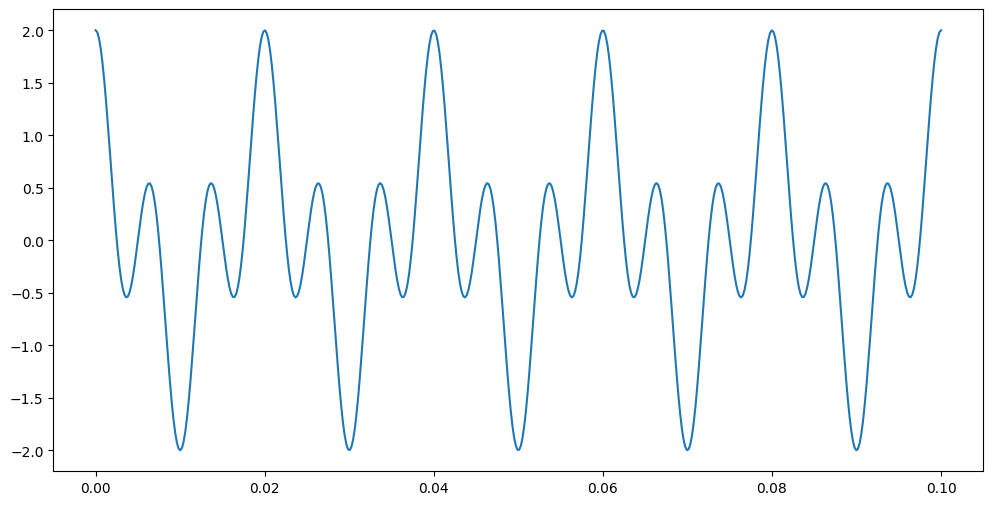

In [9]:
cos_args = np.linspace(0, 0.1, num=500)
y_cos = cos_func(cos_args)

plt.figure(figsize=(12, 6))

plt.plot(cos_args, y_cos)

plt.show()

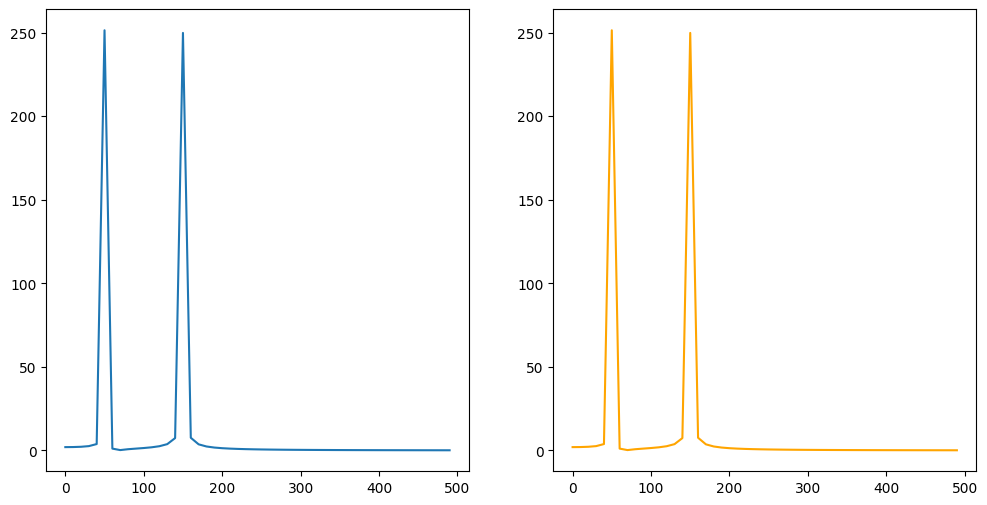

In [16]:
x_cos_fft = np.fft.fftfreq(500, 0.1 / 500)

y_cos_fft = np.fft.fft(y_cos)
y_cos_dft_slow = dft_slow(y_cos)

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.plot(x_cos_fft[0:50], np.abs(y_cos_fft)[0:50])

plt.subplot(122)
plt.plot(x_cos_fft[0:50], np.abs(y_cos_dft_slow)[0:50], 'orange')

plt.show()

In [78]:
check_time = np.random.random(1024)

%timeit dft_slow(check_time)
%timeit np.fft.fft(check_time)

45.6 ms ± 224 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
9.79 µs ± 26.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


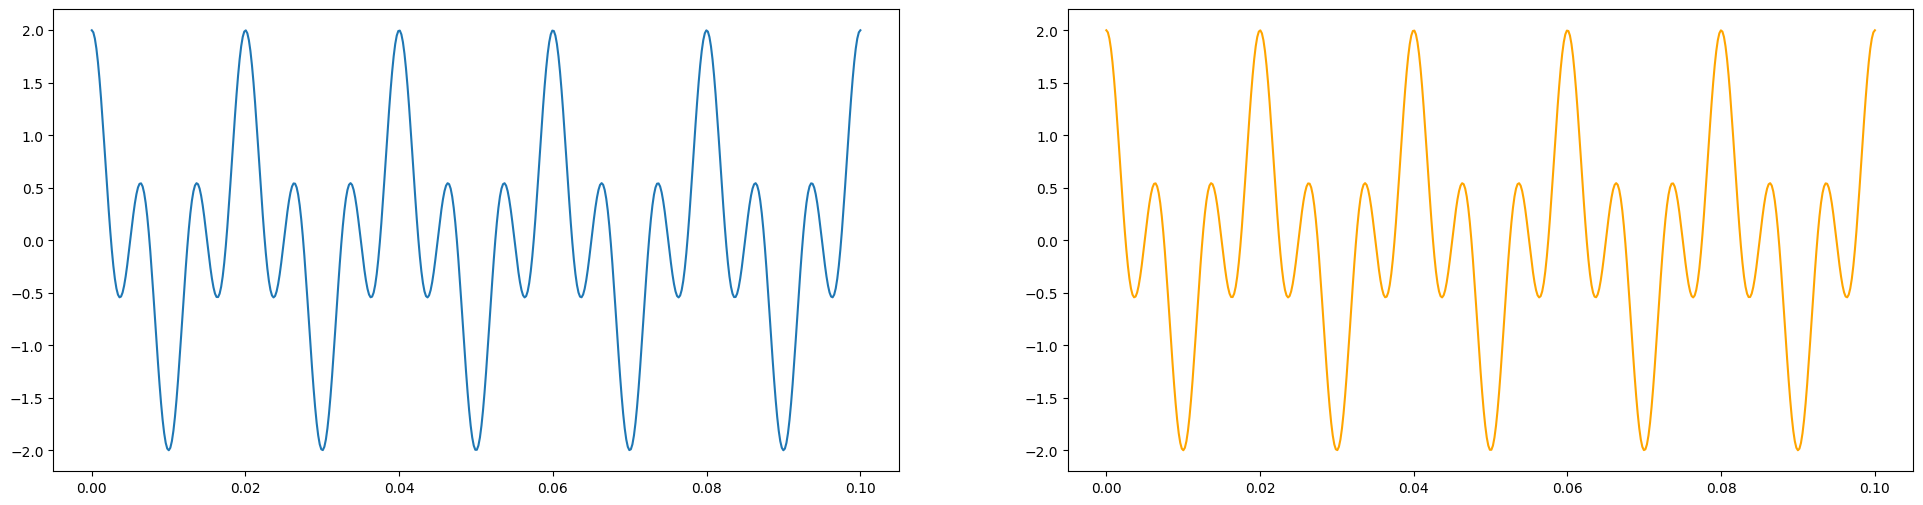

In [26]:
y_cos_from_ifft_fft = np.fft.ifft(y_cos_fft)
y_cos_from_ifft_dft_slow = np.fft.ifft(y_cos_dft_slow)

plt.figure(figsize=(24, 6))

plt.subplot(121)
plt.plot(cos_args, y_cos_from_ifft_fft)

plt.subplot(122)
plt.plot(cos_args, y_cos_from_ifft_dft_slow, 'orange')

plt.show()

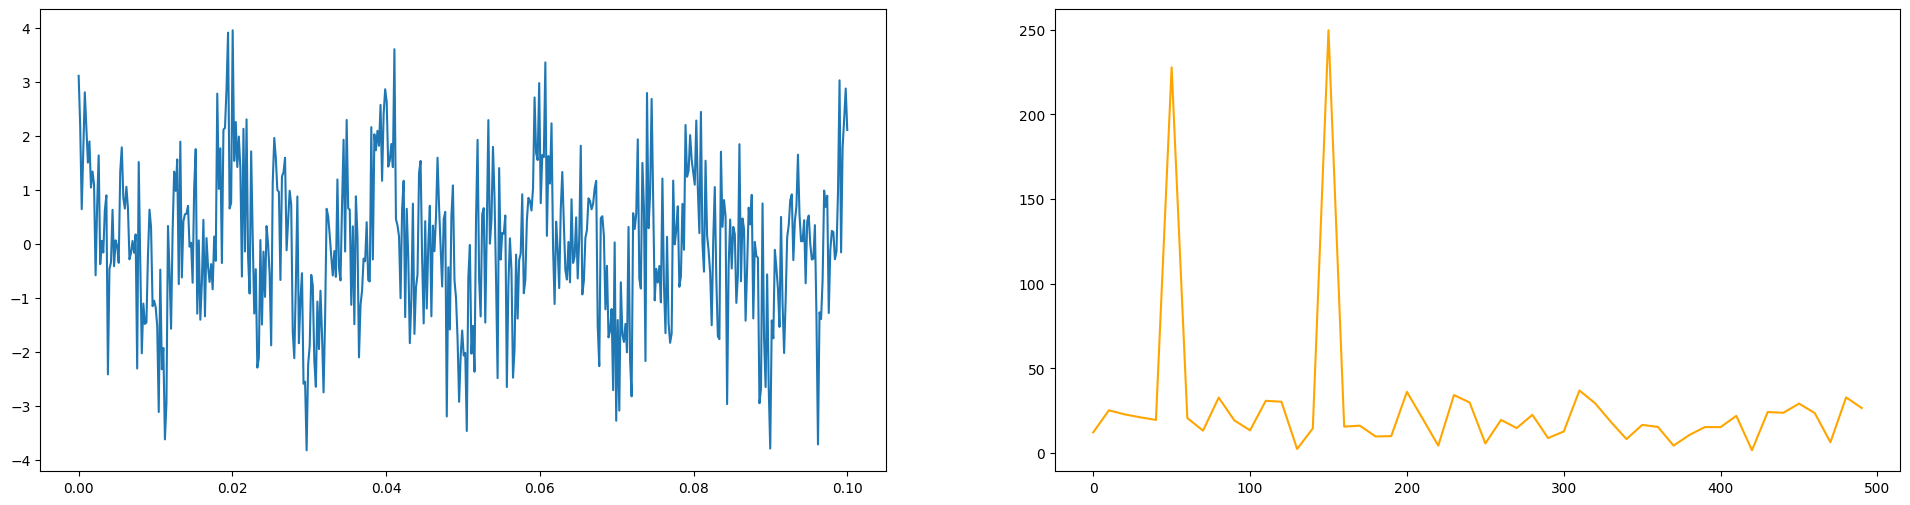

In [66]:
y_cos_noise = y_cos + np.random.normal(0, 1, 500)
y_cos_fft_noise = np.fft.fft(y_cos_noise)

plt.figure(figsize=(24, 6))

plt.subplot(121)
plt.plot(cos_args, y_cos_noise)

plt.subplot(122)
plt.plot(x_cos_fft[0:50], np.abs(y_cos_fft_noise)[0:50], 'orange')

plt.show()

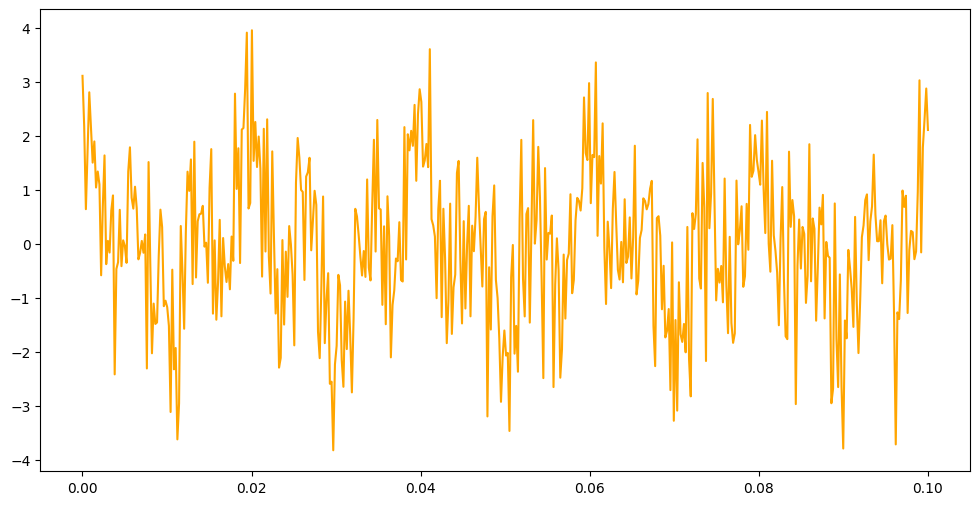

In [68]:
y_cos_from_fft_noise = np.fft.ifft(y_cos_fft_noise)

plt.figure(figsize=(12, 6))

plt.plot(cos_args, y_cos_from_fft_noise, 'orange')

plt.show()

In [50]:
def square_signal(x):
    if x % 2 < 1:
        return 2
    else:
        return -2

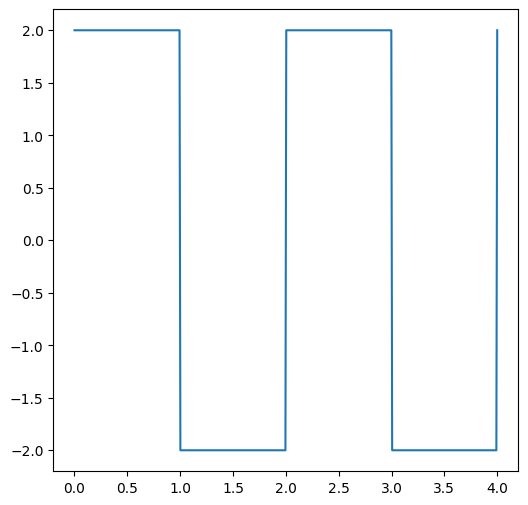

In [84]:
square_args = np.linspace(0.0, 4.0, 500)
y_square = [square_signal(arg) for arg in square_args]

plt.figure(figsize=(6, 6))

plt.plot(square_args, y_square)

plt.show()

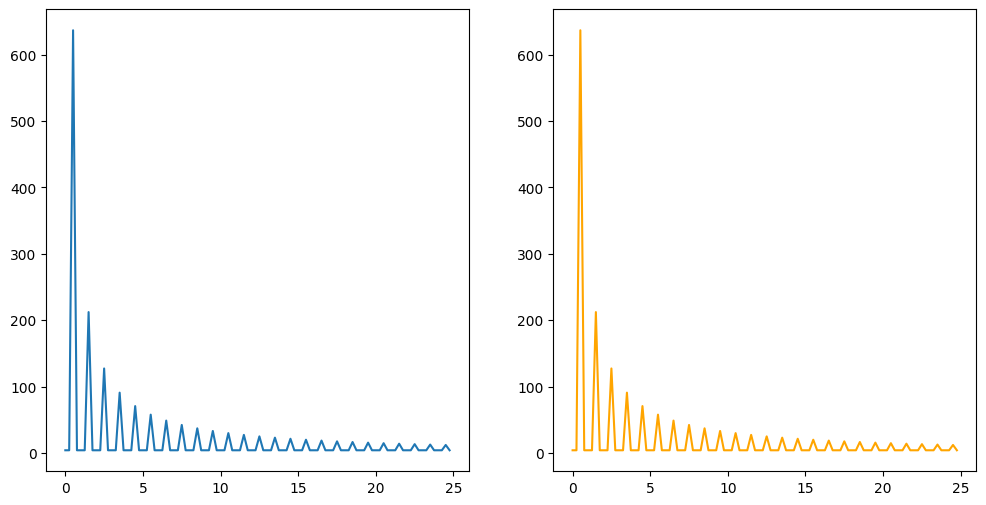

In [85]:
x_square_fft = np.fft.fftfreq(500, 4 / 500)

y_square_fft = np.fft.fft(y_square)
y_square_dft_slow = dft_slow(y_square)

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.plot(x_square_fft[0:100], np.abs(y_square_fft)[0:100])

plt.subplot(122)
plt.plot(x_square_fft[0:100], np.abs(y_square_dft_slow)[0:100], 'orange')

plt.show()

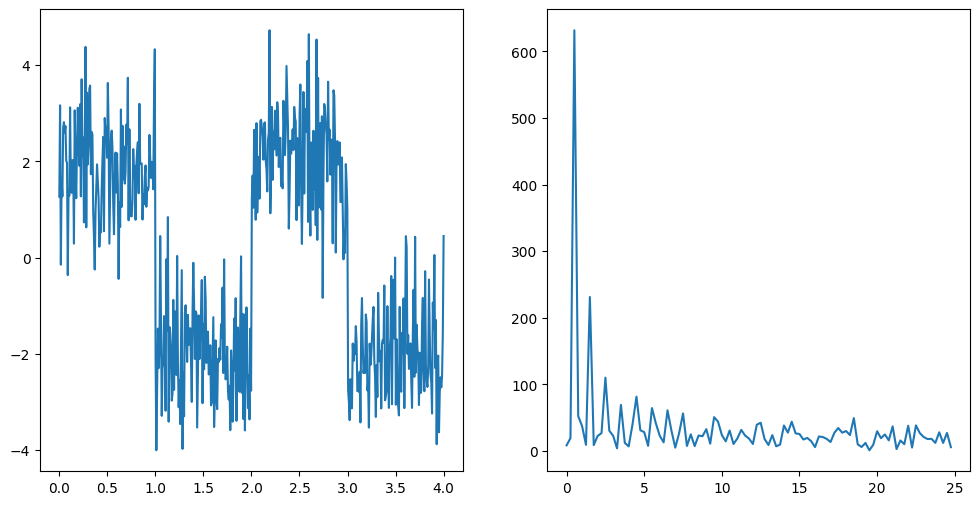

In [86]:
y_square_noise = y_square + np.random.normal(0, 1, 500)
y_square_noise_fft = np.fft.fft(y_square_noise)

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.plot(square_args, y_square_noise)

plt.subplot(122)
plt.plot(x_square_fft[0:100], np.abs(y_square_noise_fft)[0:100])

plt.show()

In [101]:
def my_fft(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    
    if N % 2 > 0:
        raise ValueError("size of x must be a power of 2")
    elif N <= 32:
        return dft_slow(x)
    else:
        X_even = my_fft(x[::2])
        X_odd = my_fft(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([X_even + factor[:N // 2] * X_odd,
                               X_even + factor[N // 2:] * X_odd])

In [102]:
def fifty_cos(x):
    f = 50
    return np.cos(2 * np.pi * f * x)

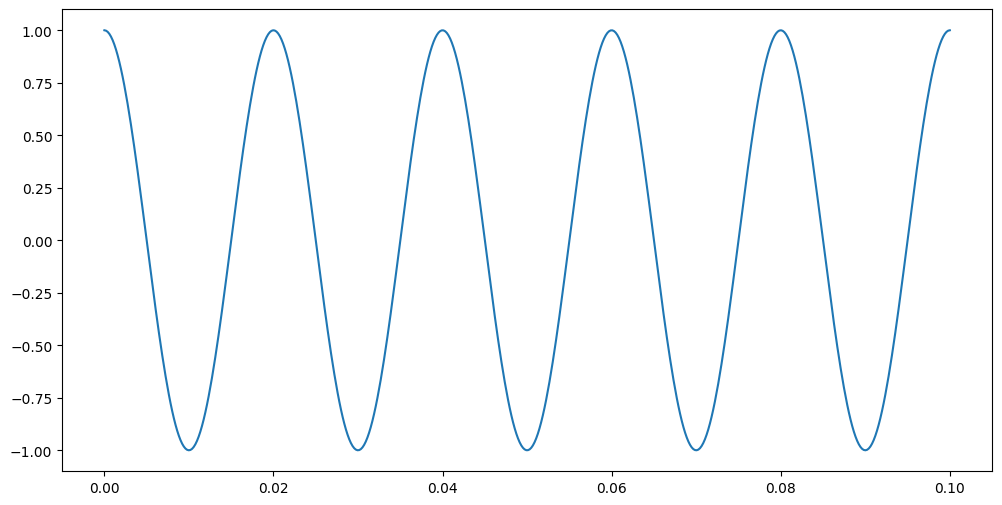

In [103]:
fifty_cos_args = np.linspace(0, 0.1, 512)
y_fifty_cos = fifty_cos(fifty_cos_args)

plt.figure(figsize=(12, 6))

plt.plot(fifty_cos_args, y_fifty_cos)

plt.show()

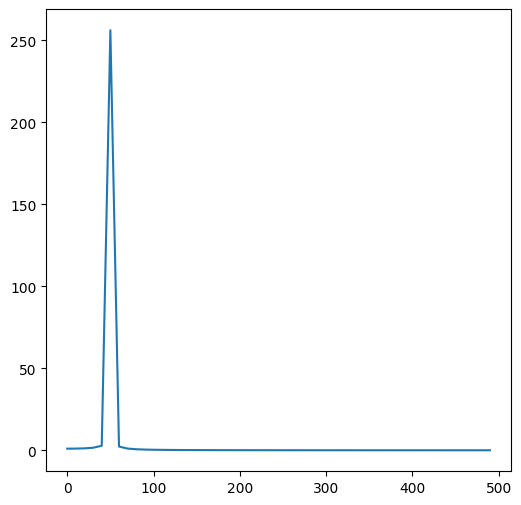

In [104]:
x_fifty_cos_myfft = np.fft.fftfreq(512, 0.1 / 512)
y_fifty_cos_myfft = my_fft(y_fifty_cos)

plt.figure(figsize=(6, 6))

plt.plot(x_fifty_cos_myfft[0:50], np.abs(y_fifty_cos_myfft)[0:50])

plt.show()

In [106]:
%timeit dft_slow(check_time)
%timeit my_fft(check_time)
%timeit np.fft.fft(check_time)

45.3 ms ± 82.9 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.93 ms ± 2.18 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
9.68 µs ± 14.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
